In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [13]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []
    # Get a list of files in the folder
    file_list = os.listdir(folder_path)
    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [14]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [15]:
results = read_csv_files_from_folder('results/')
results.replace({'ftl_mlp_initializer': 'FTL', 'adversarial_debiasing_initializer': 'AD', 'gerry_fair_classifier_initializer': 'GFC', 'prejudice_remover_initializer': 'PR', 'simple_mlp_initializer': 'MLP'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Marketing'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [16]:
display(results)

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity
0,28,Bank Marketing,PR,mcc_parity,0.451814,0.902919,0.493627,0.055961,0.041813,0.098765
1,33,Bank Marketing,PR,mcc_odds,0.469590,0.900295,0.498464,0.028874,0.075035,0.023956
2,38,Bank Marketing,PR,mcc_opportunity,0.286930,0.900787,0.493162,0.107477,0.008737,0.206232
3,43,Bank Marketing,PR,acc_parity,0.818690,0.901115,0.478296,0.113904,0.082425,0.134470
4,48,Bank Marketing,PR,acc_odds,0.879858,0.896851,0.480816,0.016993,0.057326,0.011917
...,...,...,...,...,...,...,...,...,...,...
1834,342,German Credit,FTL,mcc_odds,0.172475,0.705000,0.354848,0.182373,0.153674,0.106413
1835,346,German Credit,FTL,mcc_opportunity,0.331920,0.745000,0.460063,0.115175,0.129345,0.128143
1836,350,German Credit,FTL,acc_parity,-0.096667,0.570000,-0.070943,0.632353,0.666667,0.764706
1837,354,German Credit,FTL,acc_odds,0.624027,0.770000,0.268941,0.145973,0.115937,0.056651


In [17]:
datasets = results['dataset'].unique().tolist()
datasets

['Bank Marketing', 'Adult Income', 'Compas Recidivism', 'German Credit']

In [18]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [19]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds':  'Max(Acc - Eq. Opp.)'
}

In [20]:
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

display(results)

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,Performance,Fairness,Fitness Rule,Fitness Rule Abvr
0,28,Bank Marketing,PR,mcc_parity,0.451814,0.902919,0.493627,0.055961,0.041813,0.098765,0.493627,0.041813,Max(Mathew Correlation - Statistical Parity),Max(MCC - Stat. Parity)
1,33,Bank Marketing,PR,mcc_odds,0.469590,0.900295,0.498464,0.028874,0.075035,0.023956,0.498464,0.028874,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
2,38,Bank Marketing,PR,mcc_opportunity,0.286930,0.900787,0.493162,0.107477,0.008737,0.206232,0.493162,0.206232,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
3,43,Bank Marketing,PR,acc_parity,0.818690,0.901115,0.478296,0.113904,0.082425,0.134470,0.901115,0.082425,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
4,48,Bank Marketing,PR,acc_odds,0.879858,0.896851,0.480816,0.016993,0.057326,0.011917,0.896851,0.016993,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,342,German Credit,FTL,mcc_odds,0.172475,0.705000,0.354848,0.182373,0.153674,0.106413,0.354848,0.182373,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
1835,346,German Credit,FTL,mcc_opportunity,0.331920,0.745000,0.460063,0.115175,0.129345,0.128143,0.460063,0.128143,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
1836,350,German Credit,FTL,acc_parity,-0.096667,0.570000,-0.070943,0.632353,0.666667,0.764706,0.570000,0.666667,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
1837,354,German Credit,FTL,acc_odds,0.624027,0.770000,0.268941,0.145973,0.115937,0.056651,0.770000,0.145973,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)


In [21]:
methods = ['MLP', 'FTL', 'AD', 'PR', 'GFC']

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


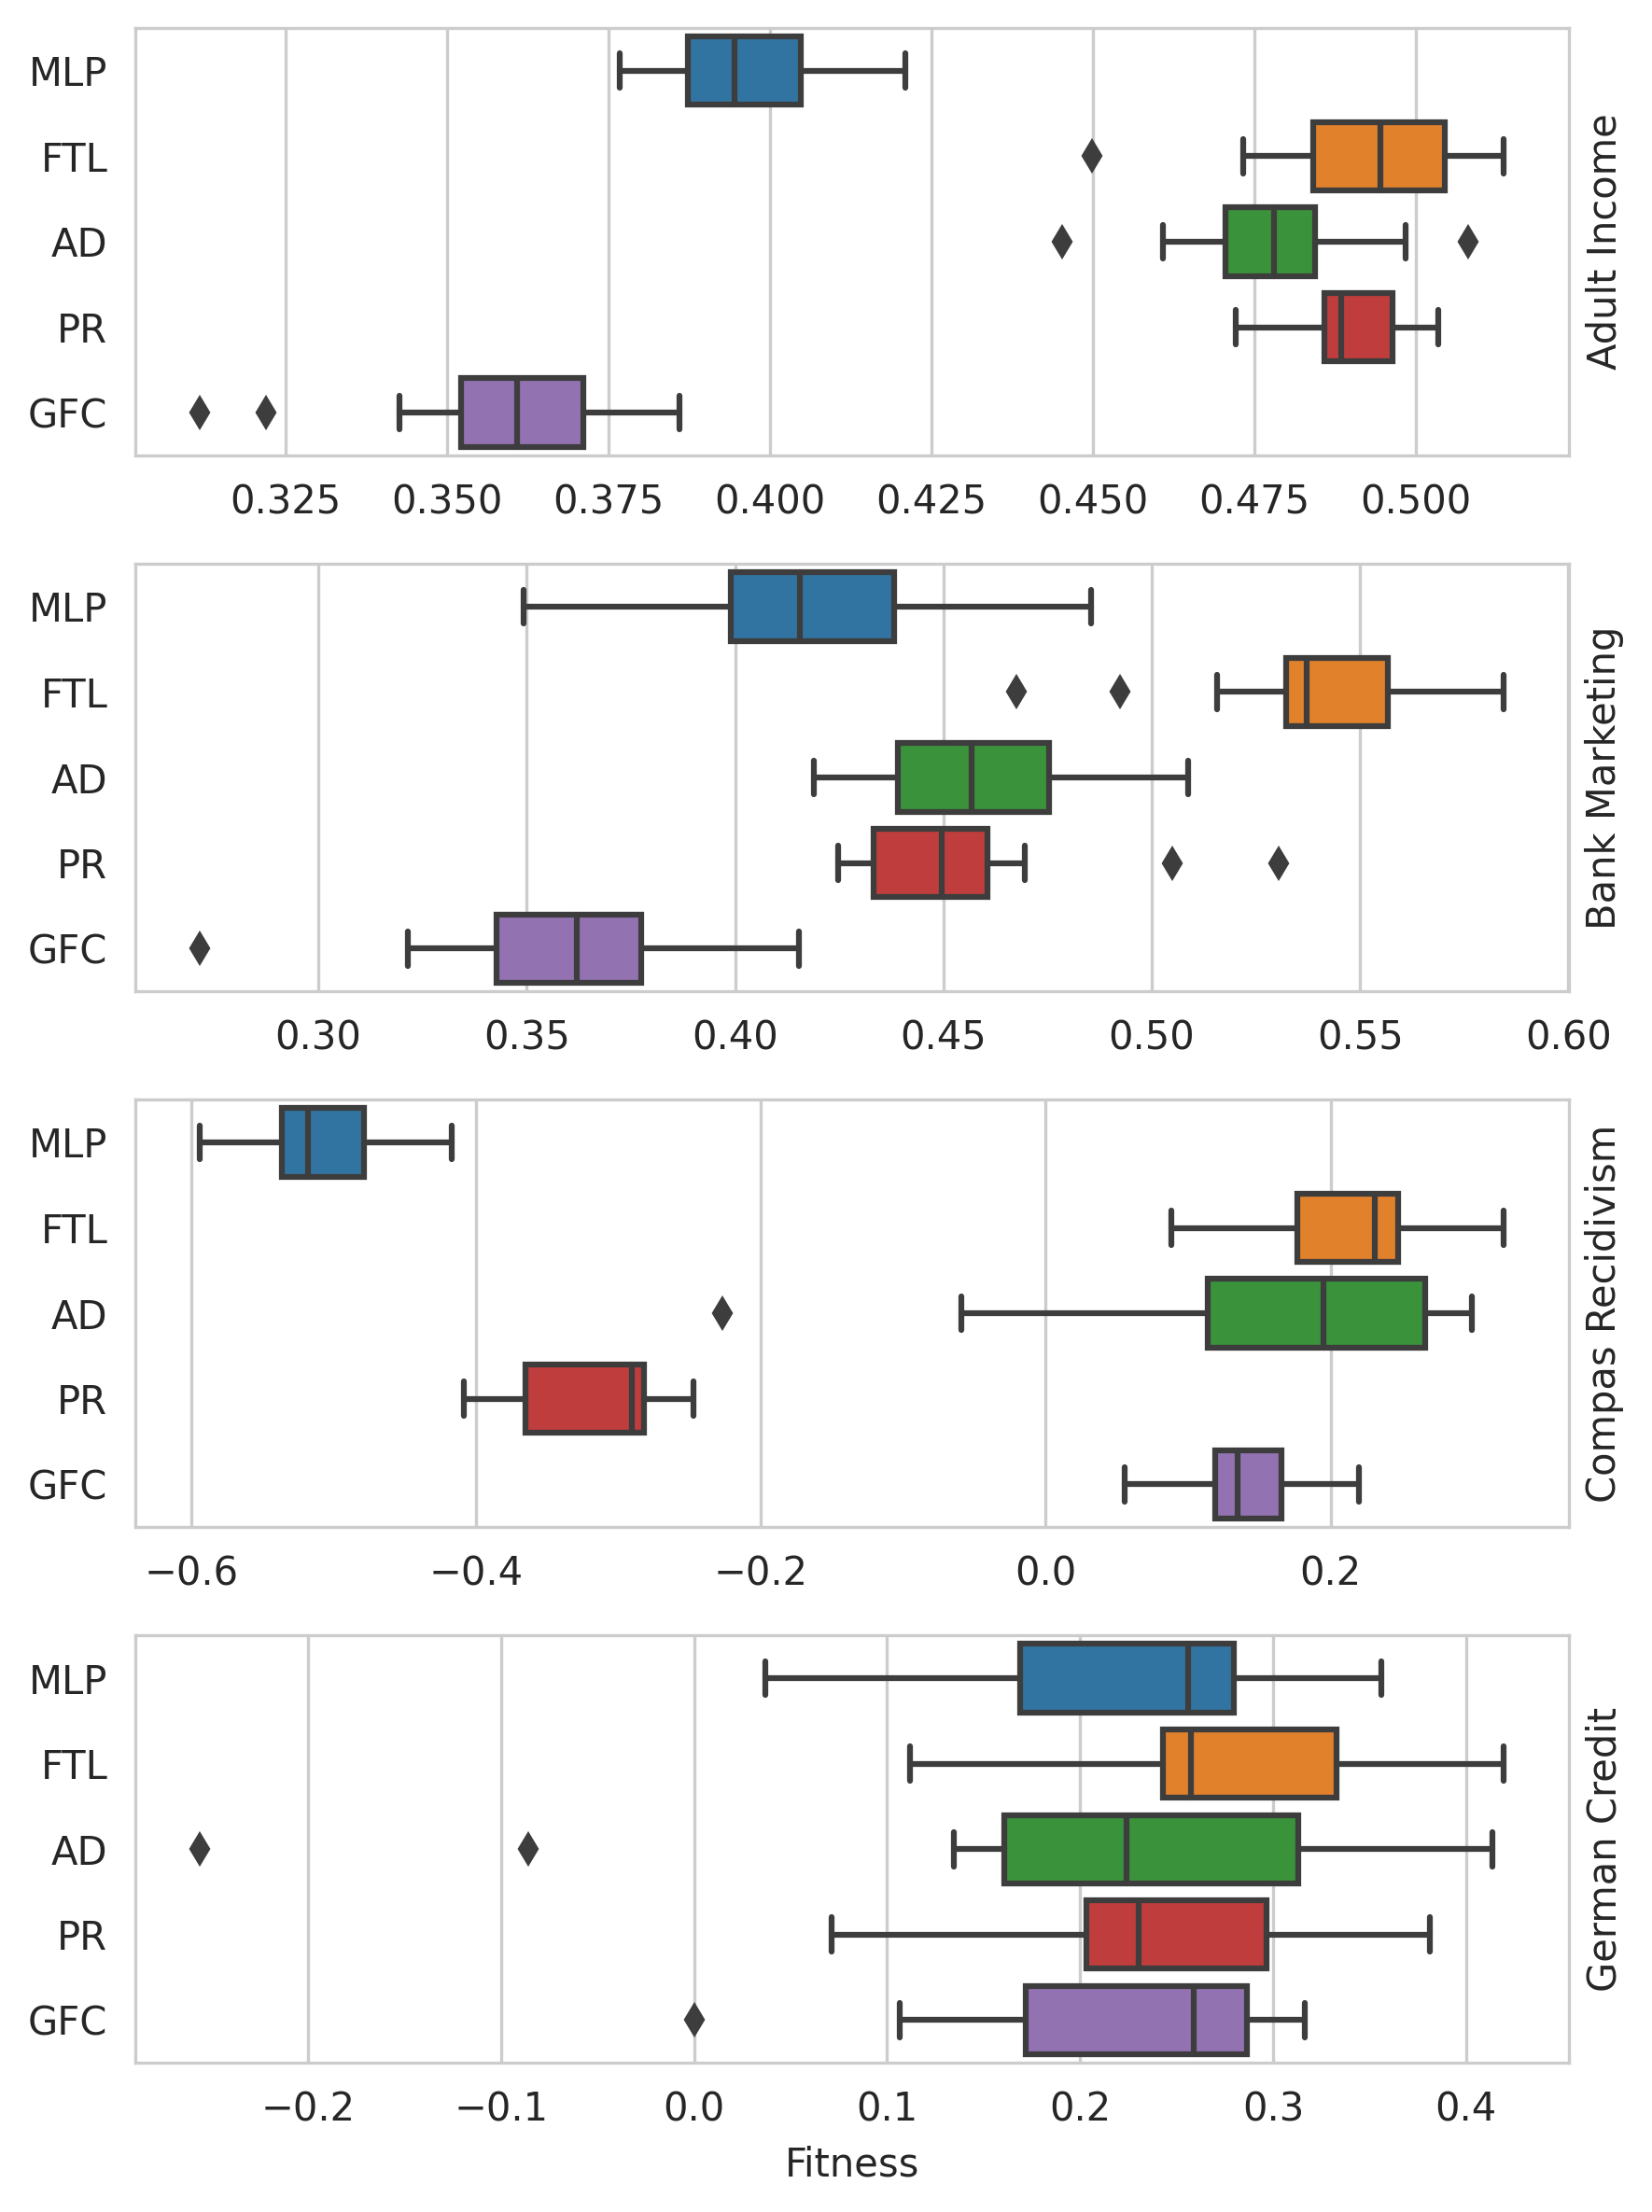

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


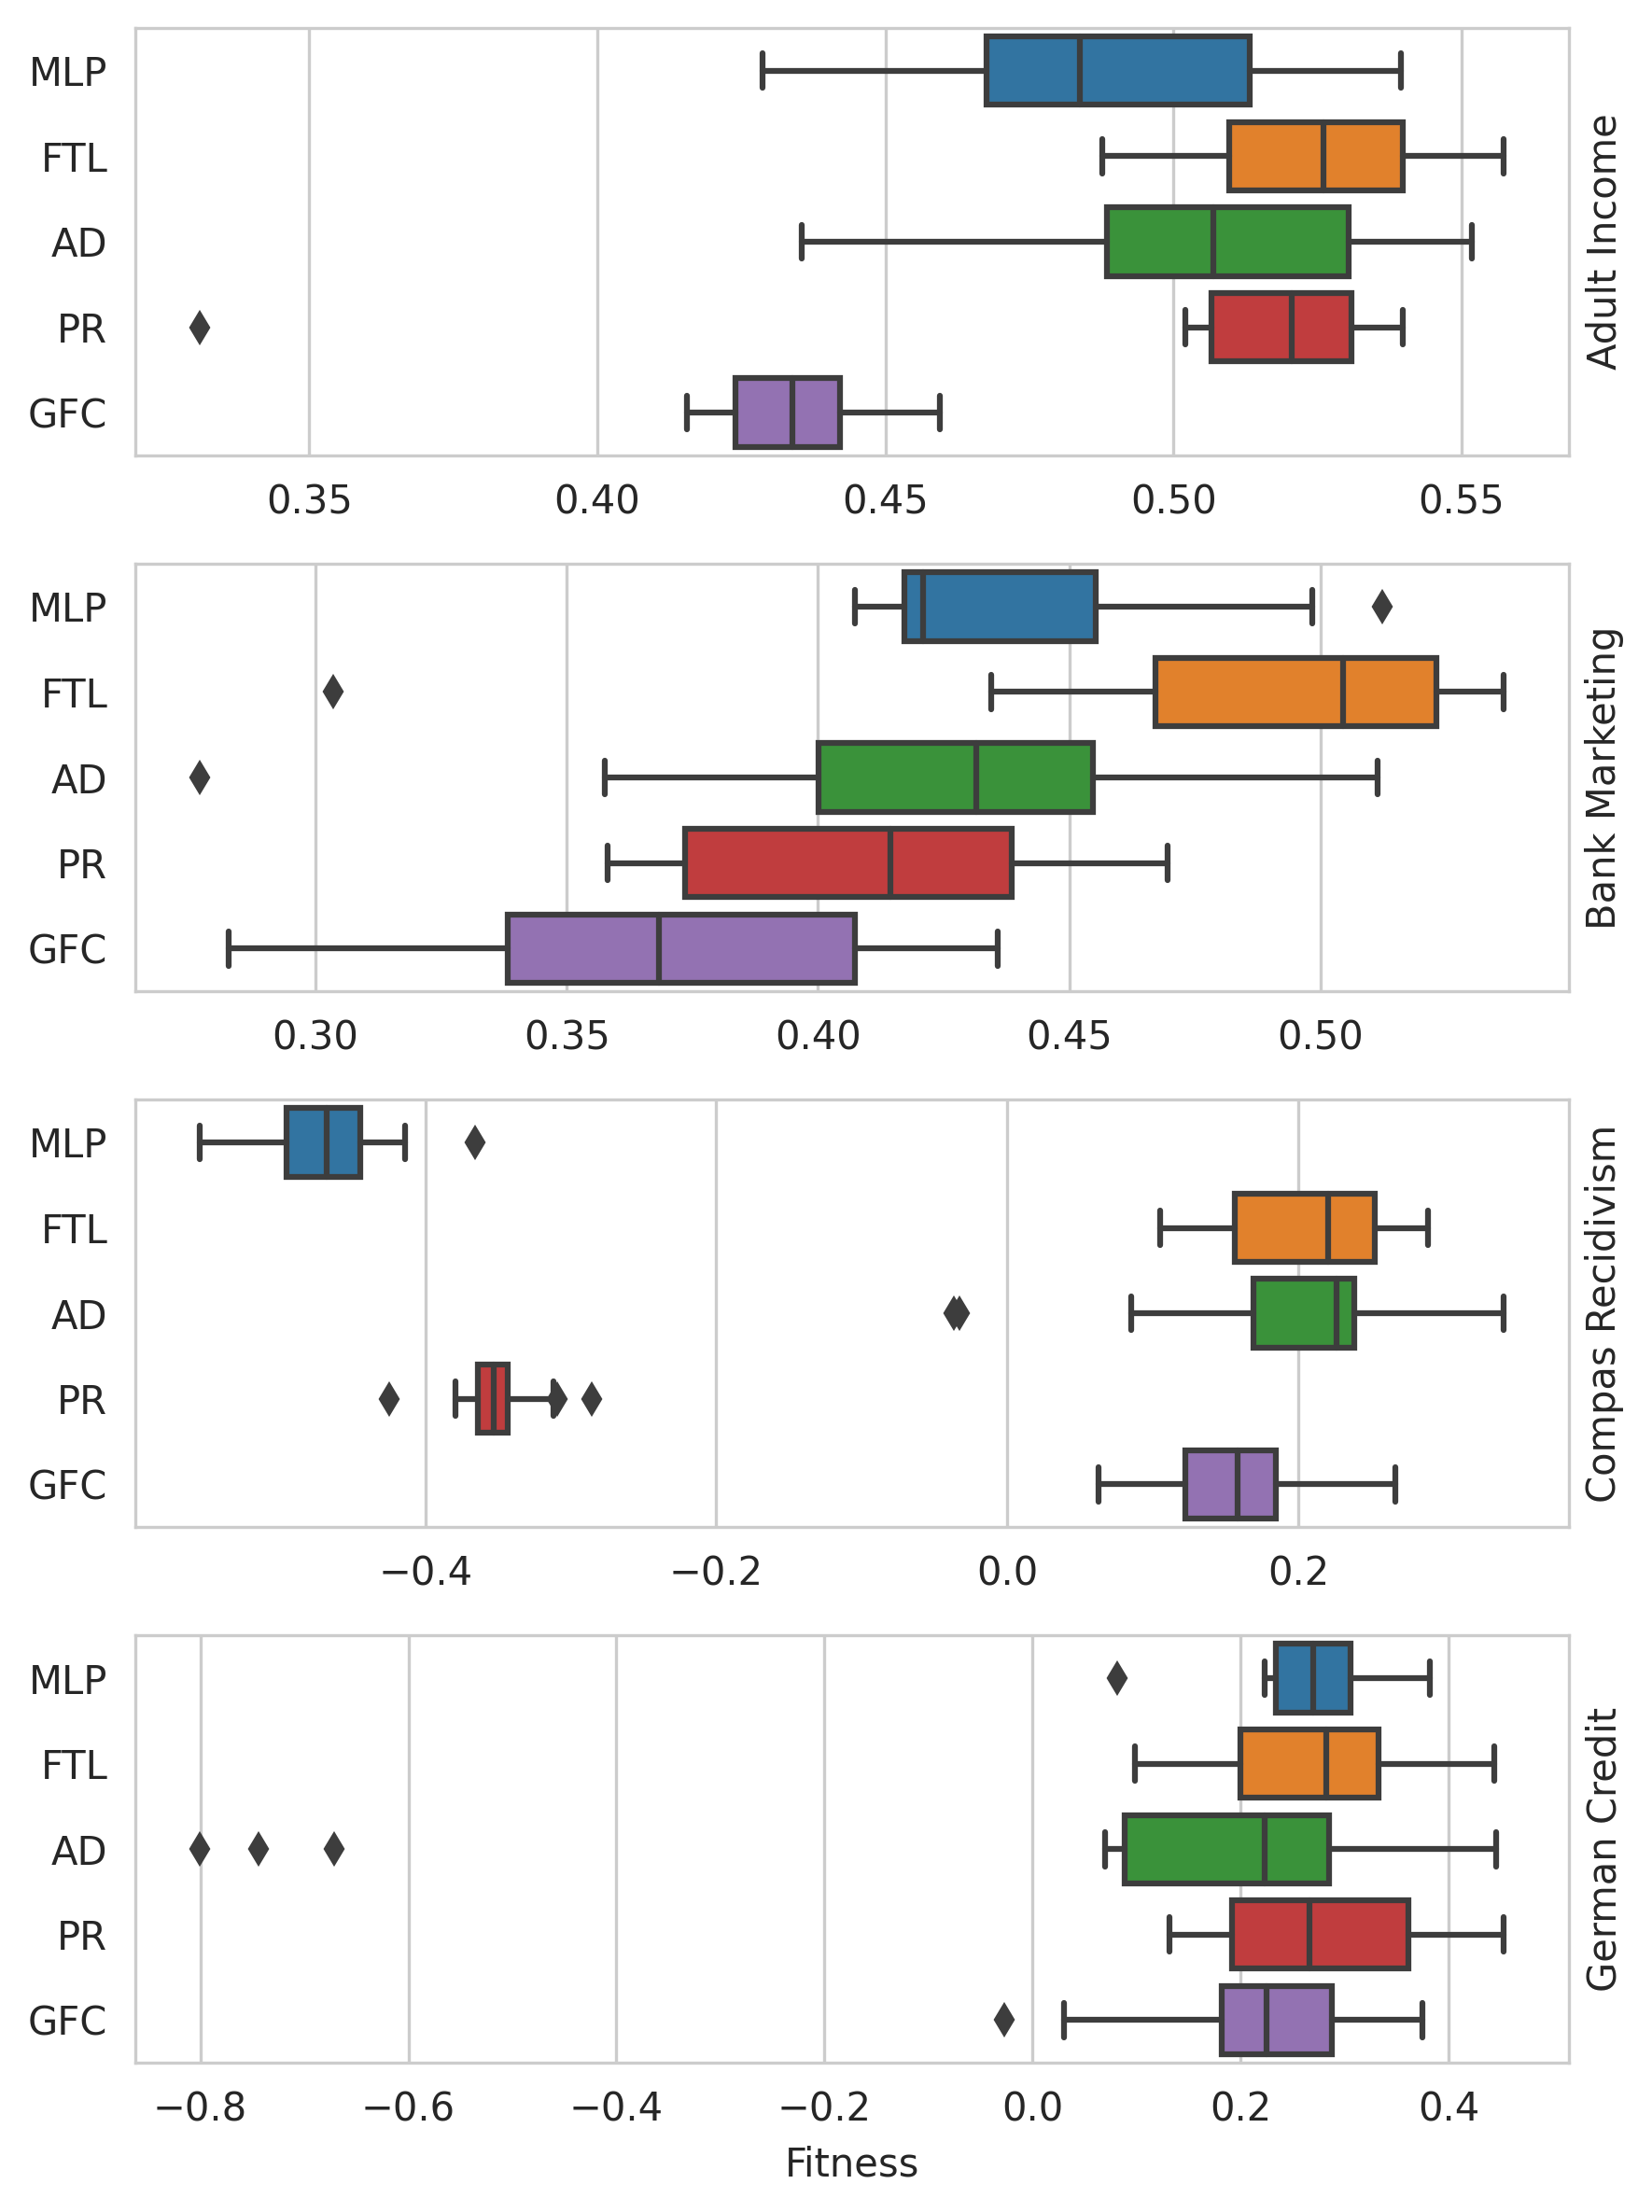

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


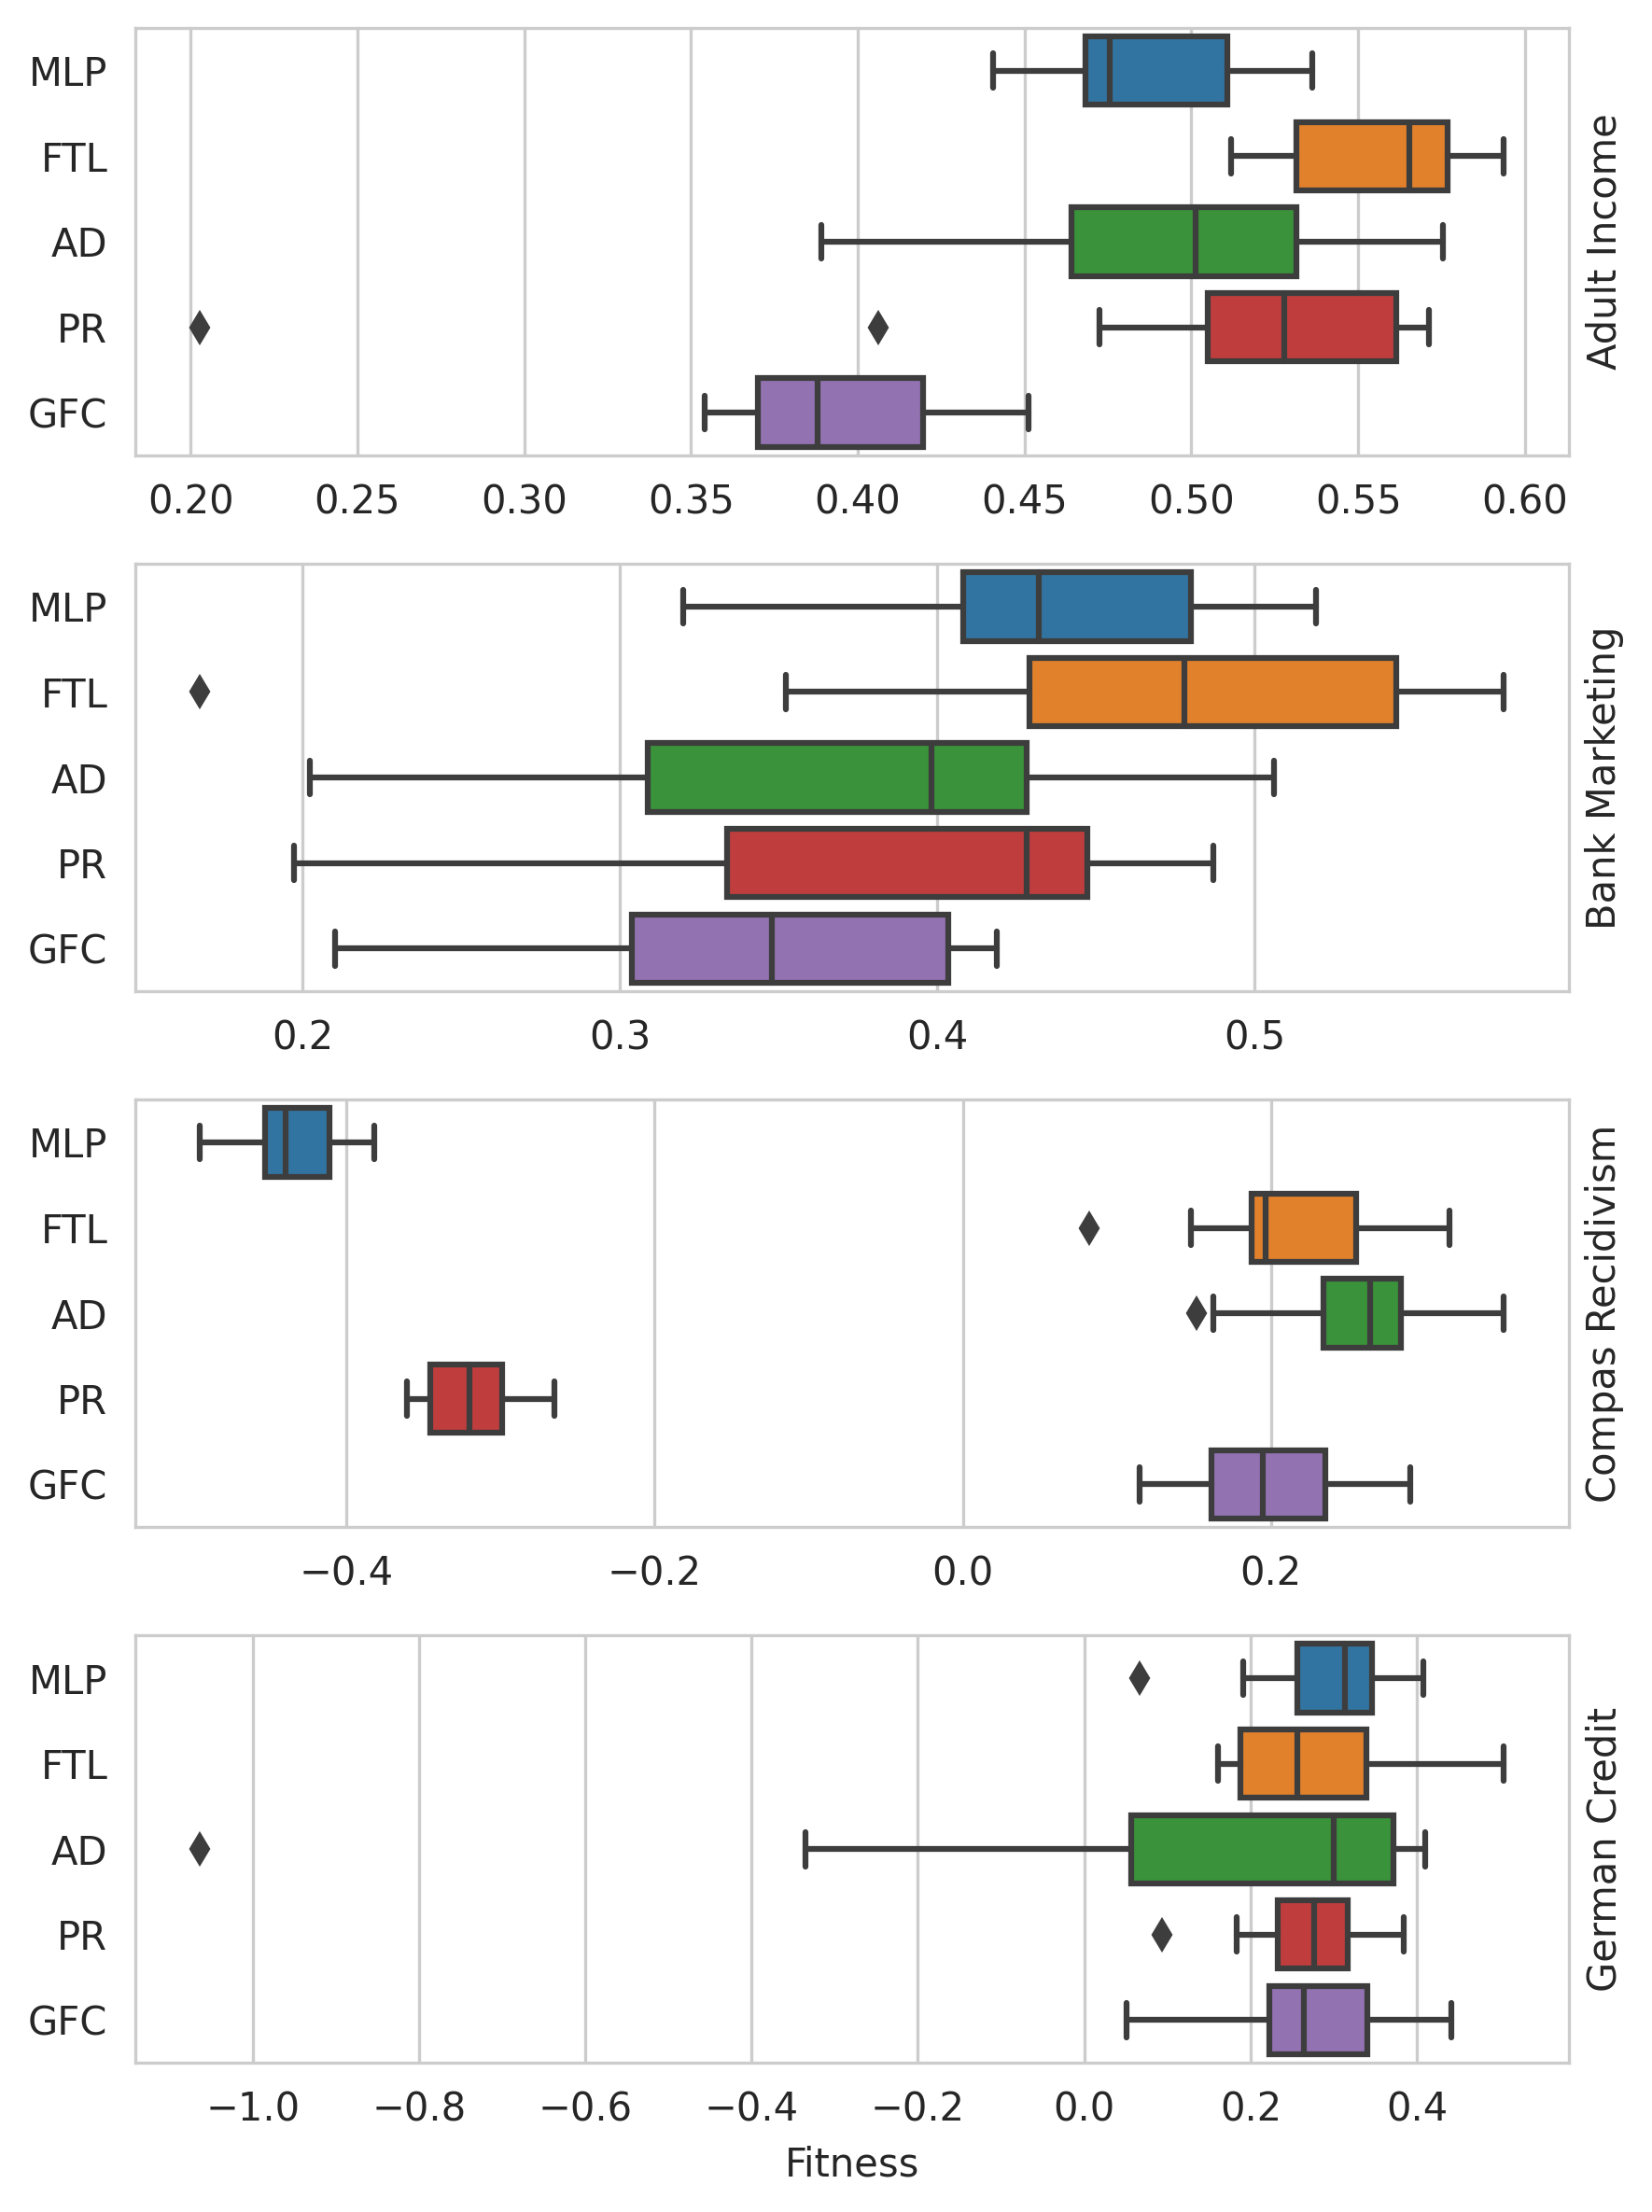

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


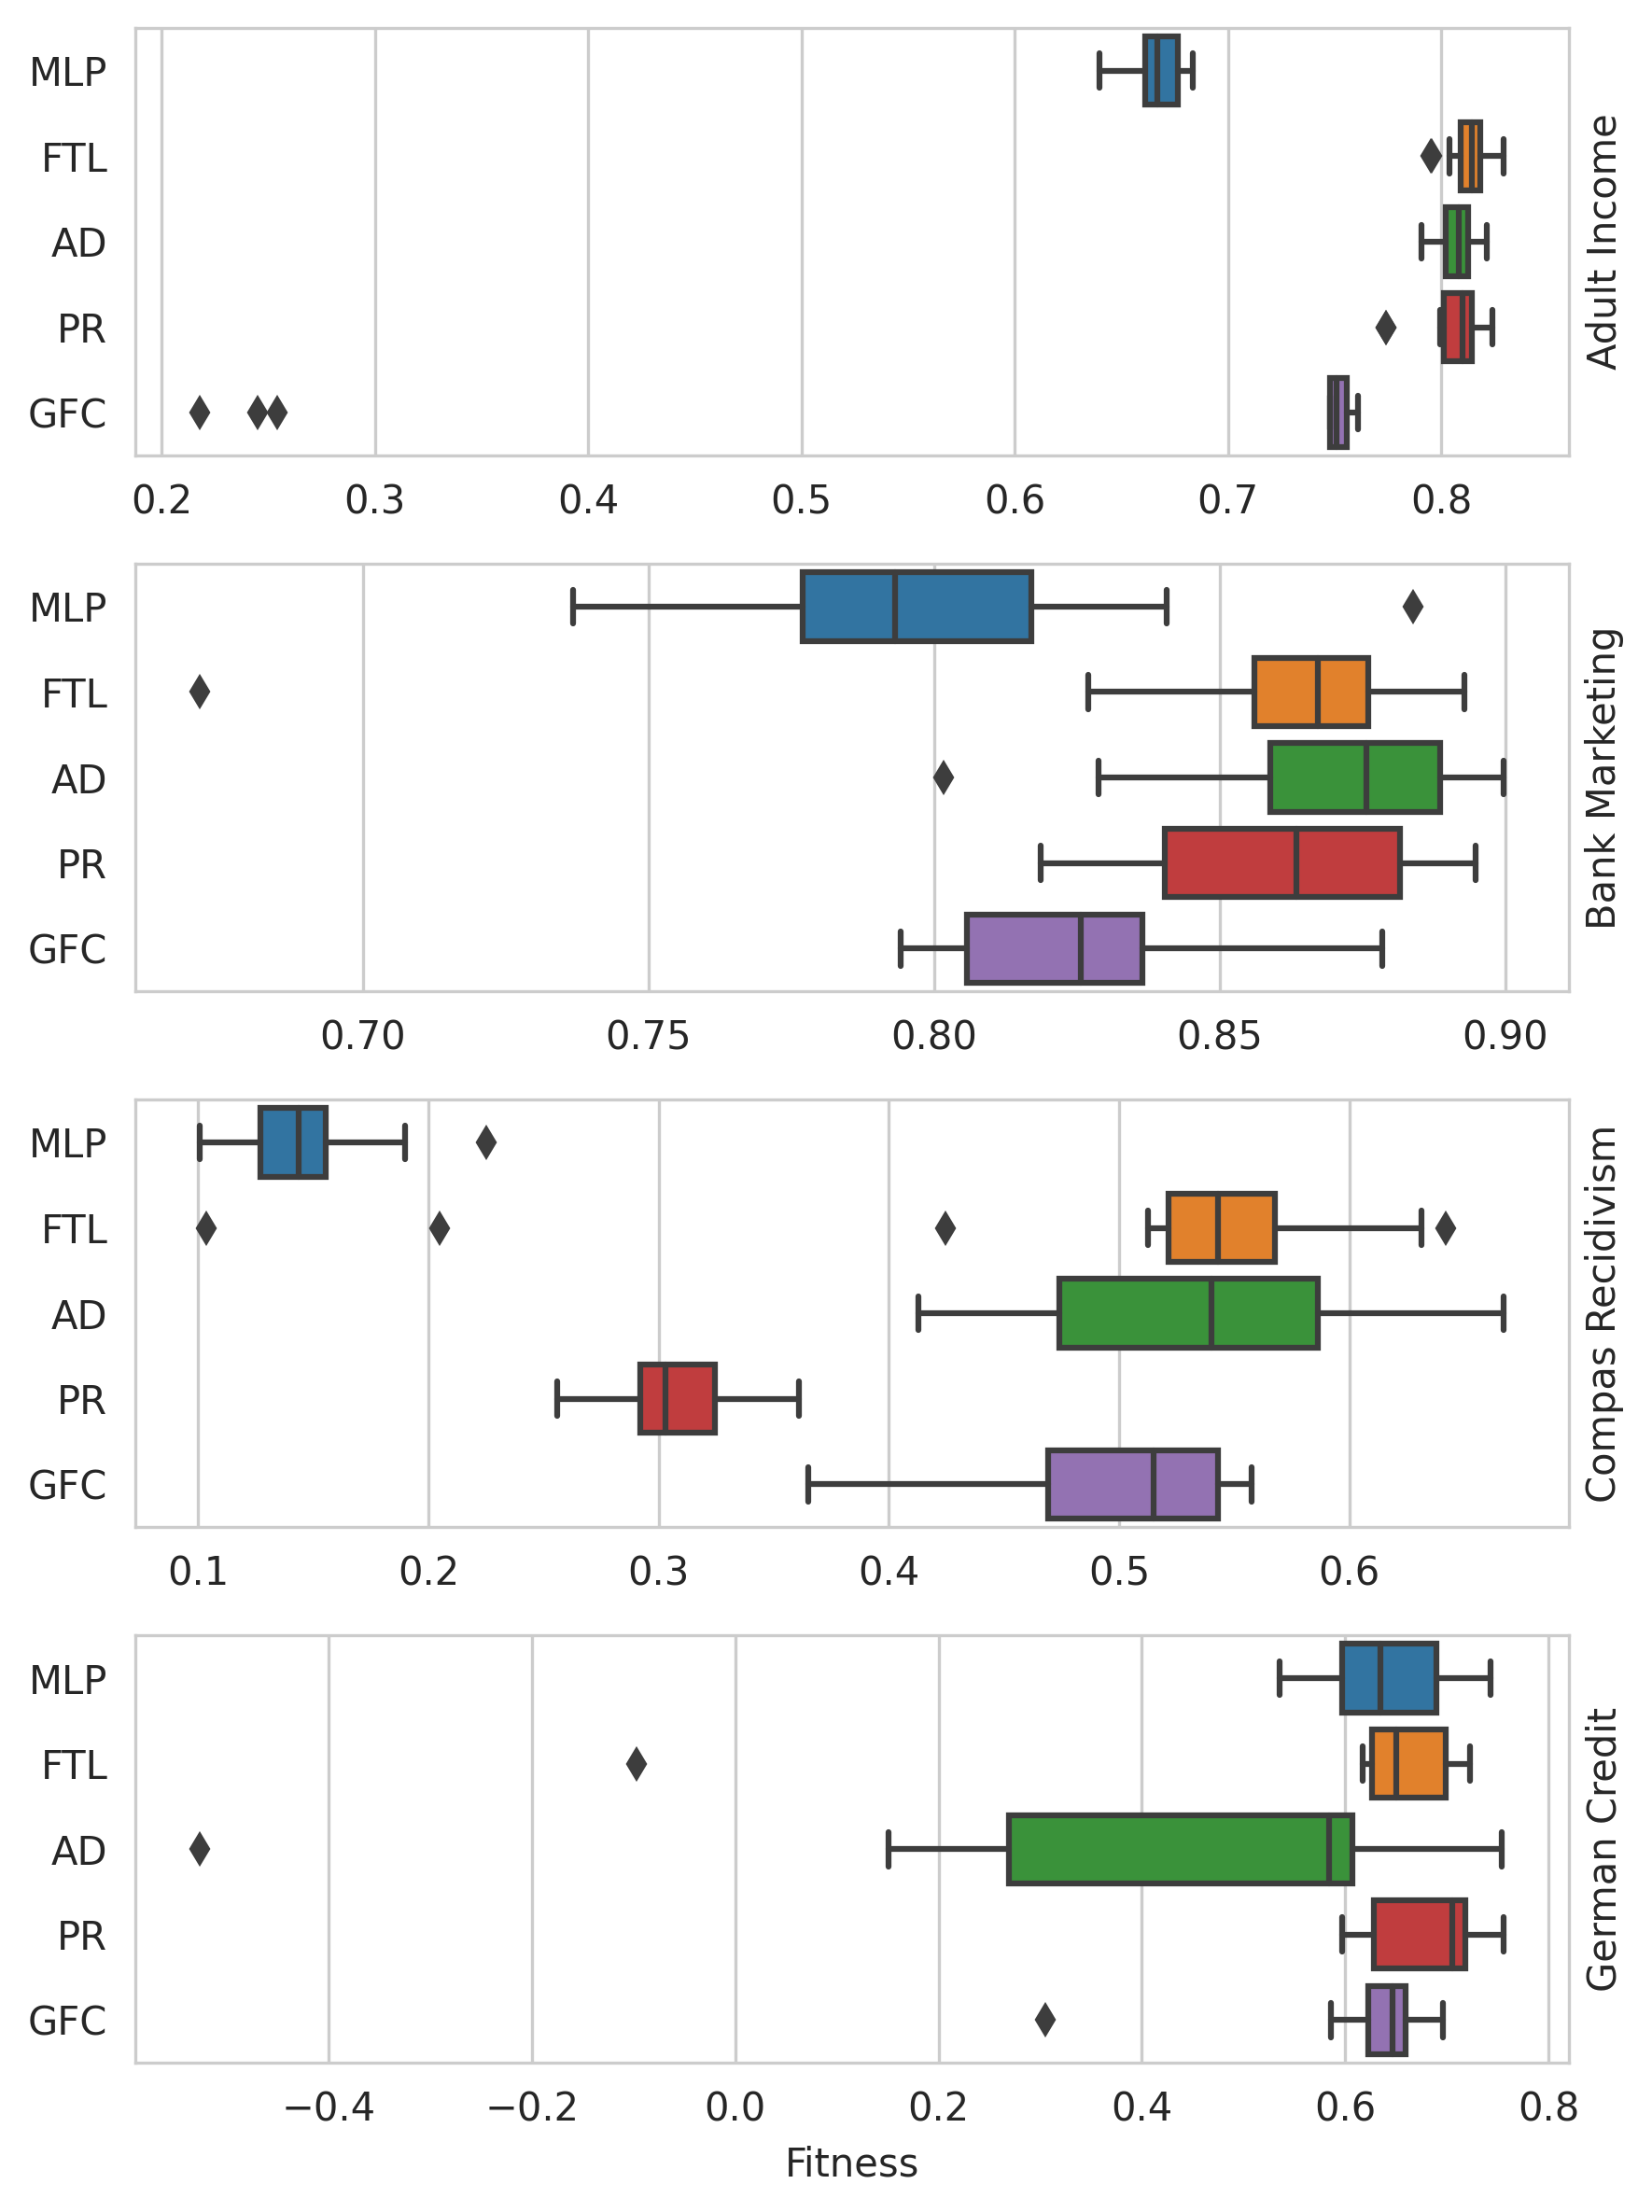

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


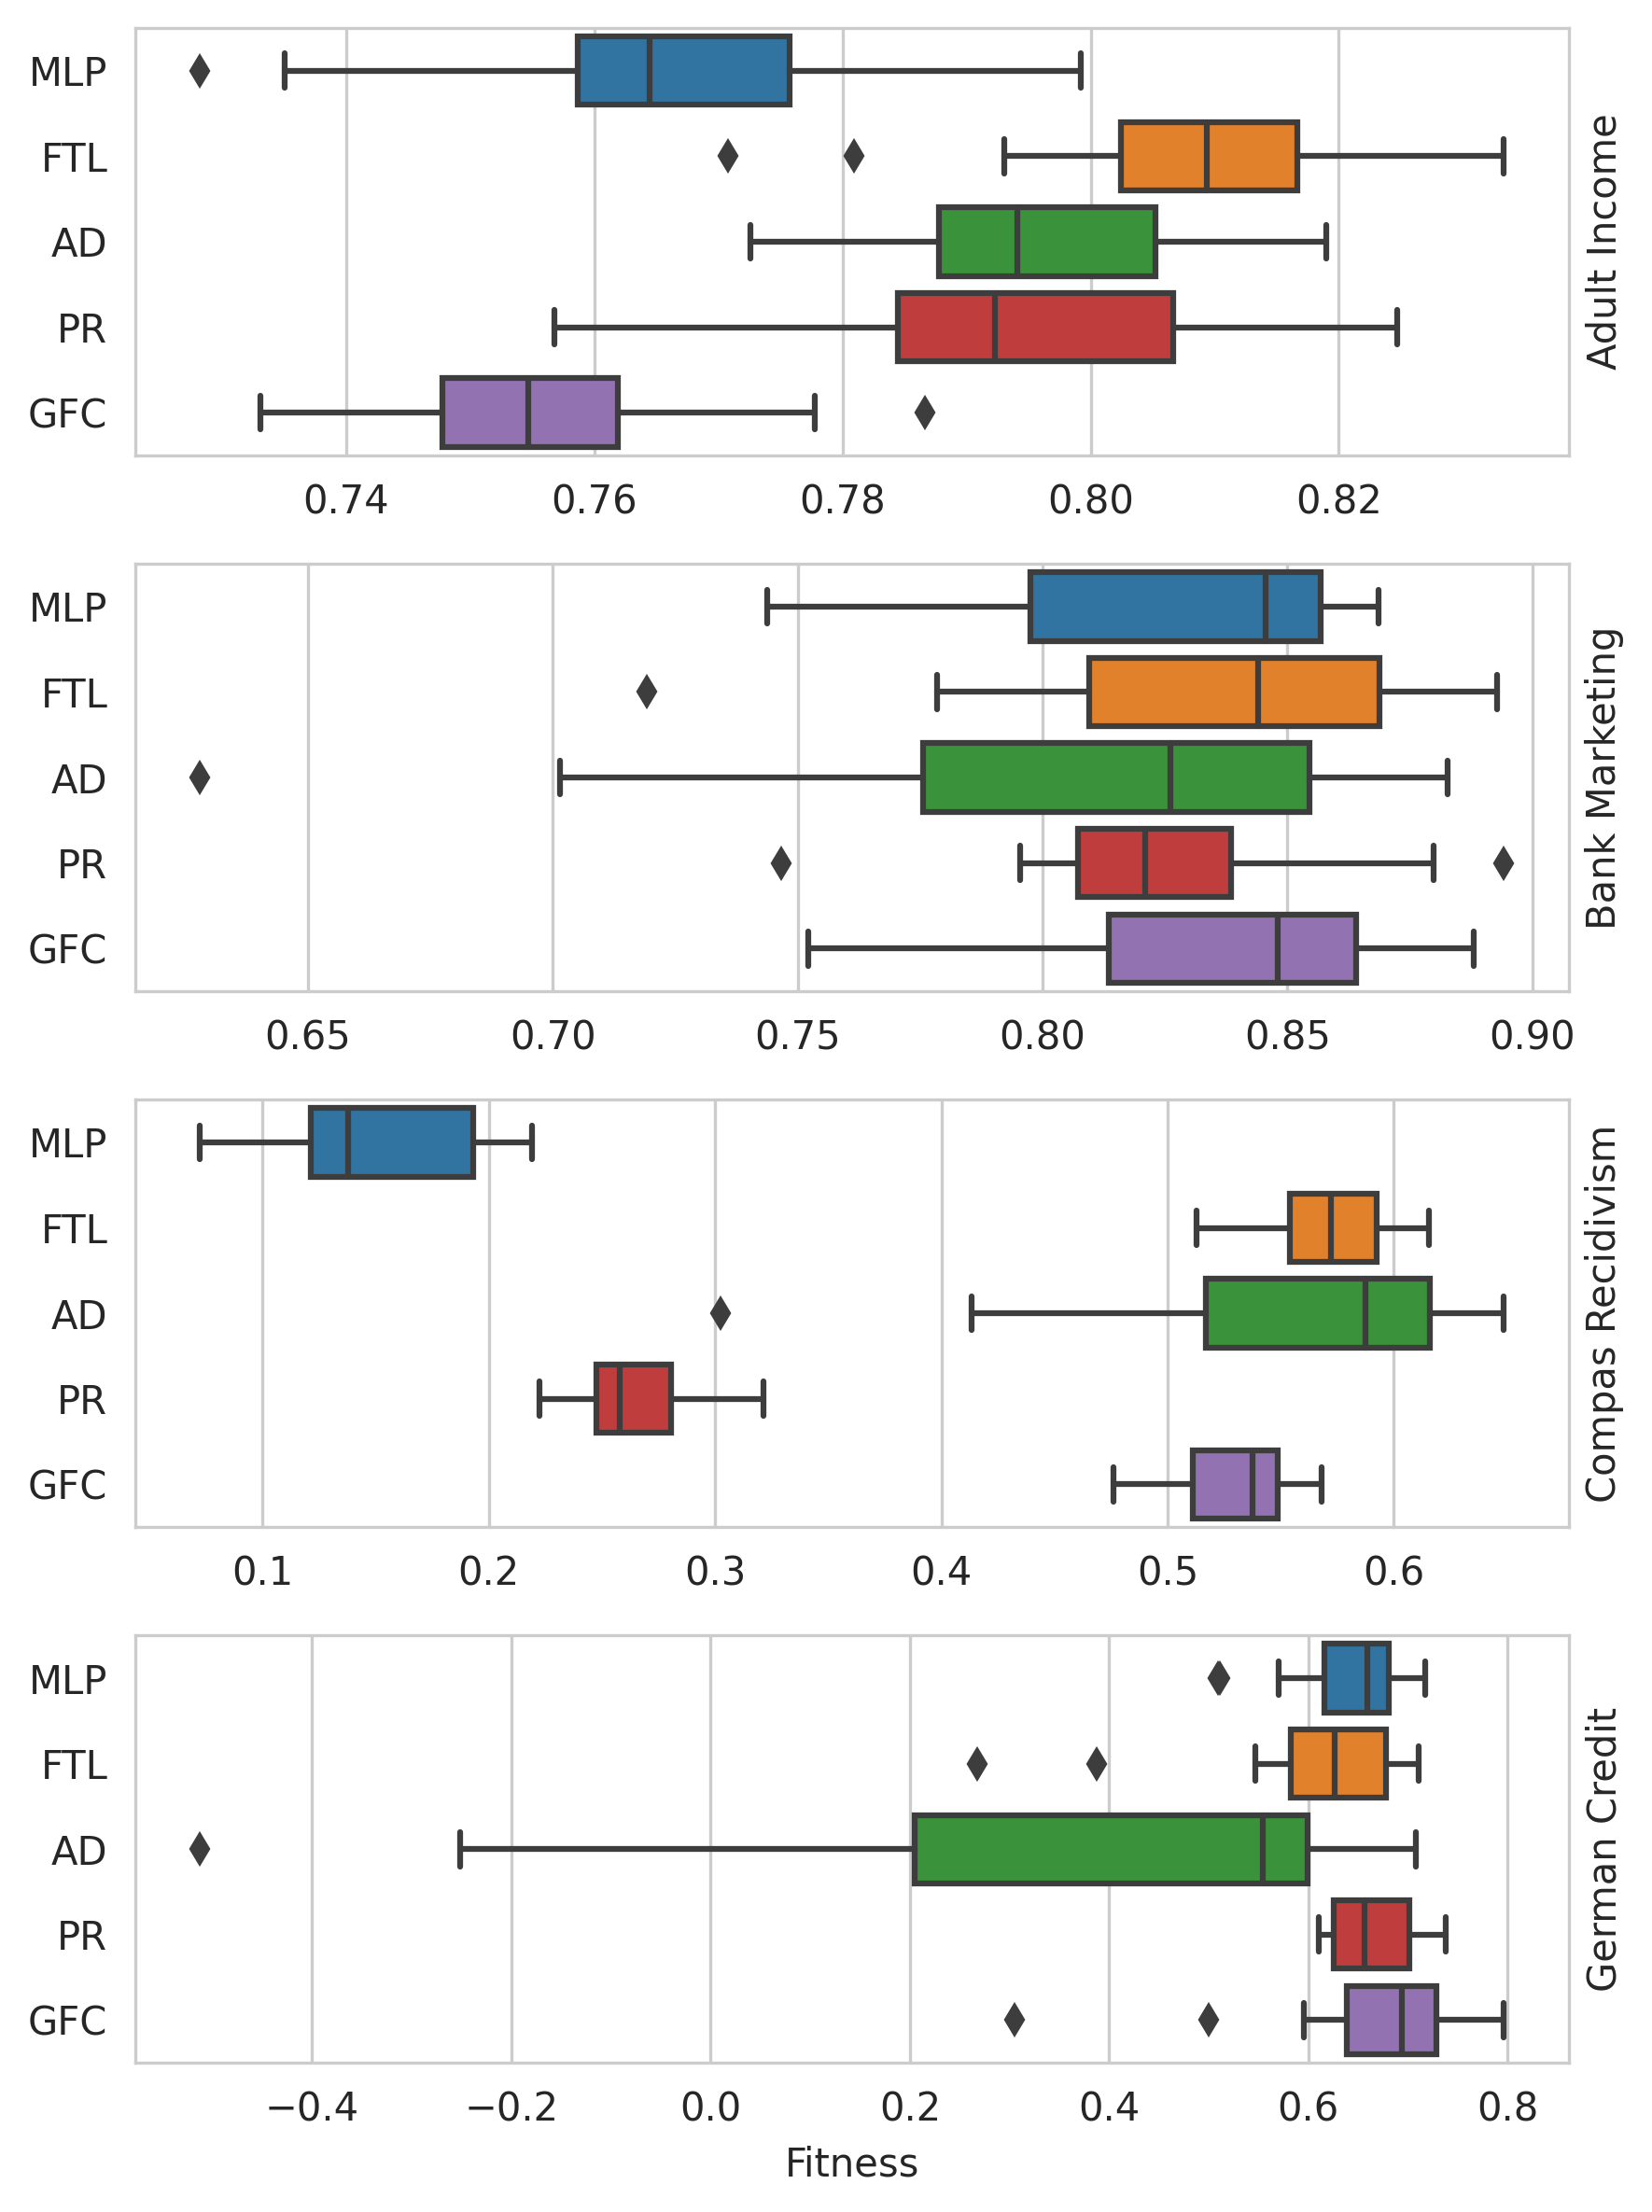

/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
/tmp/ipykernel_1279760/912414512.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


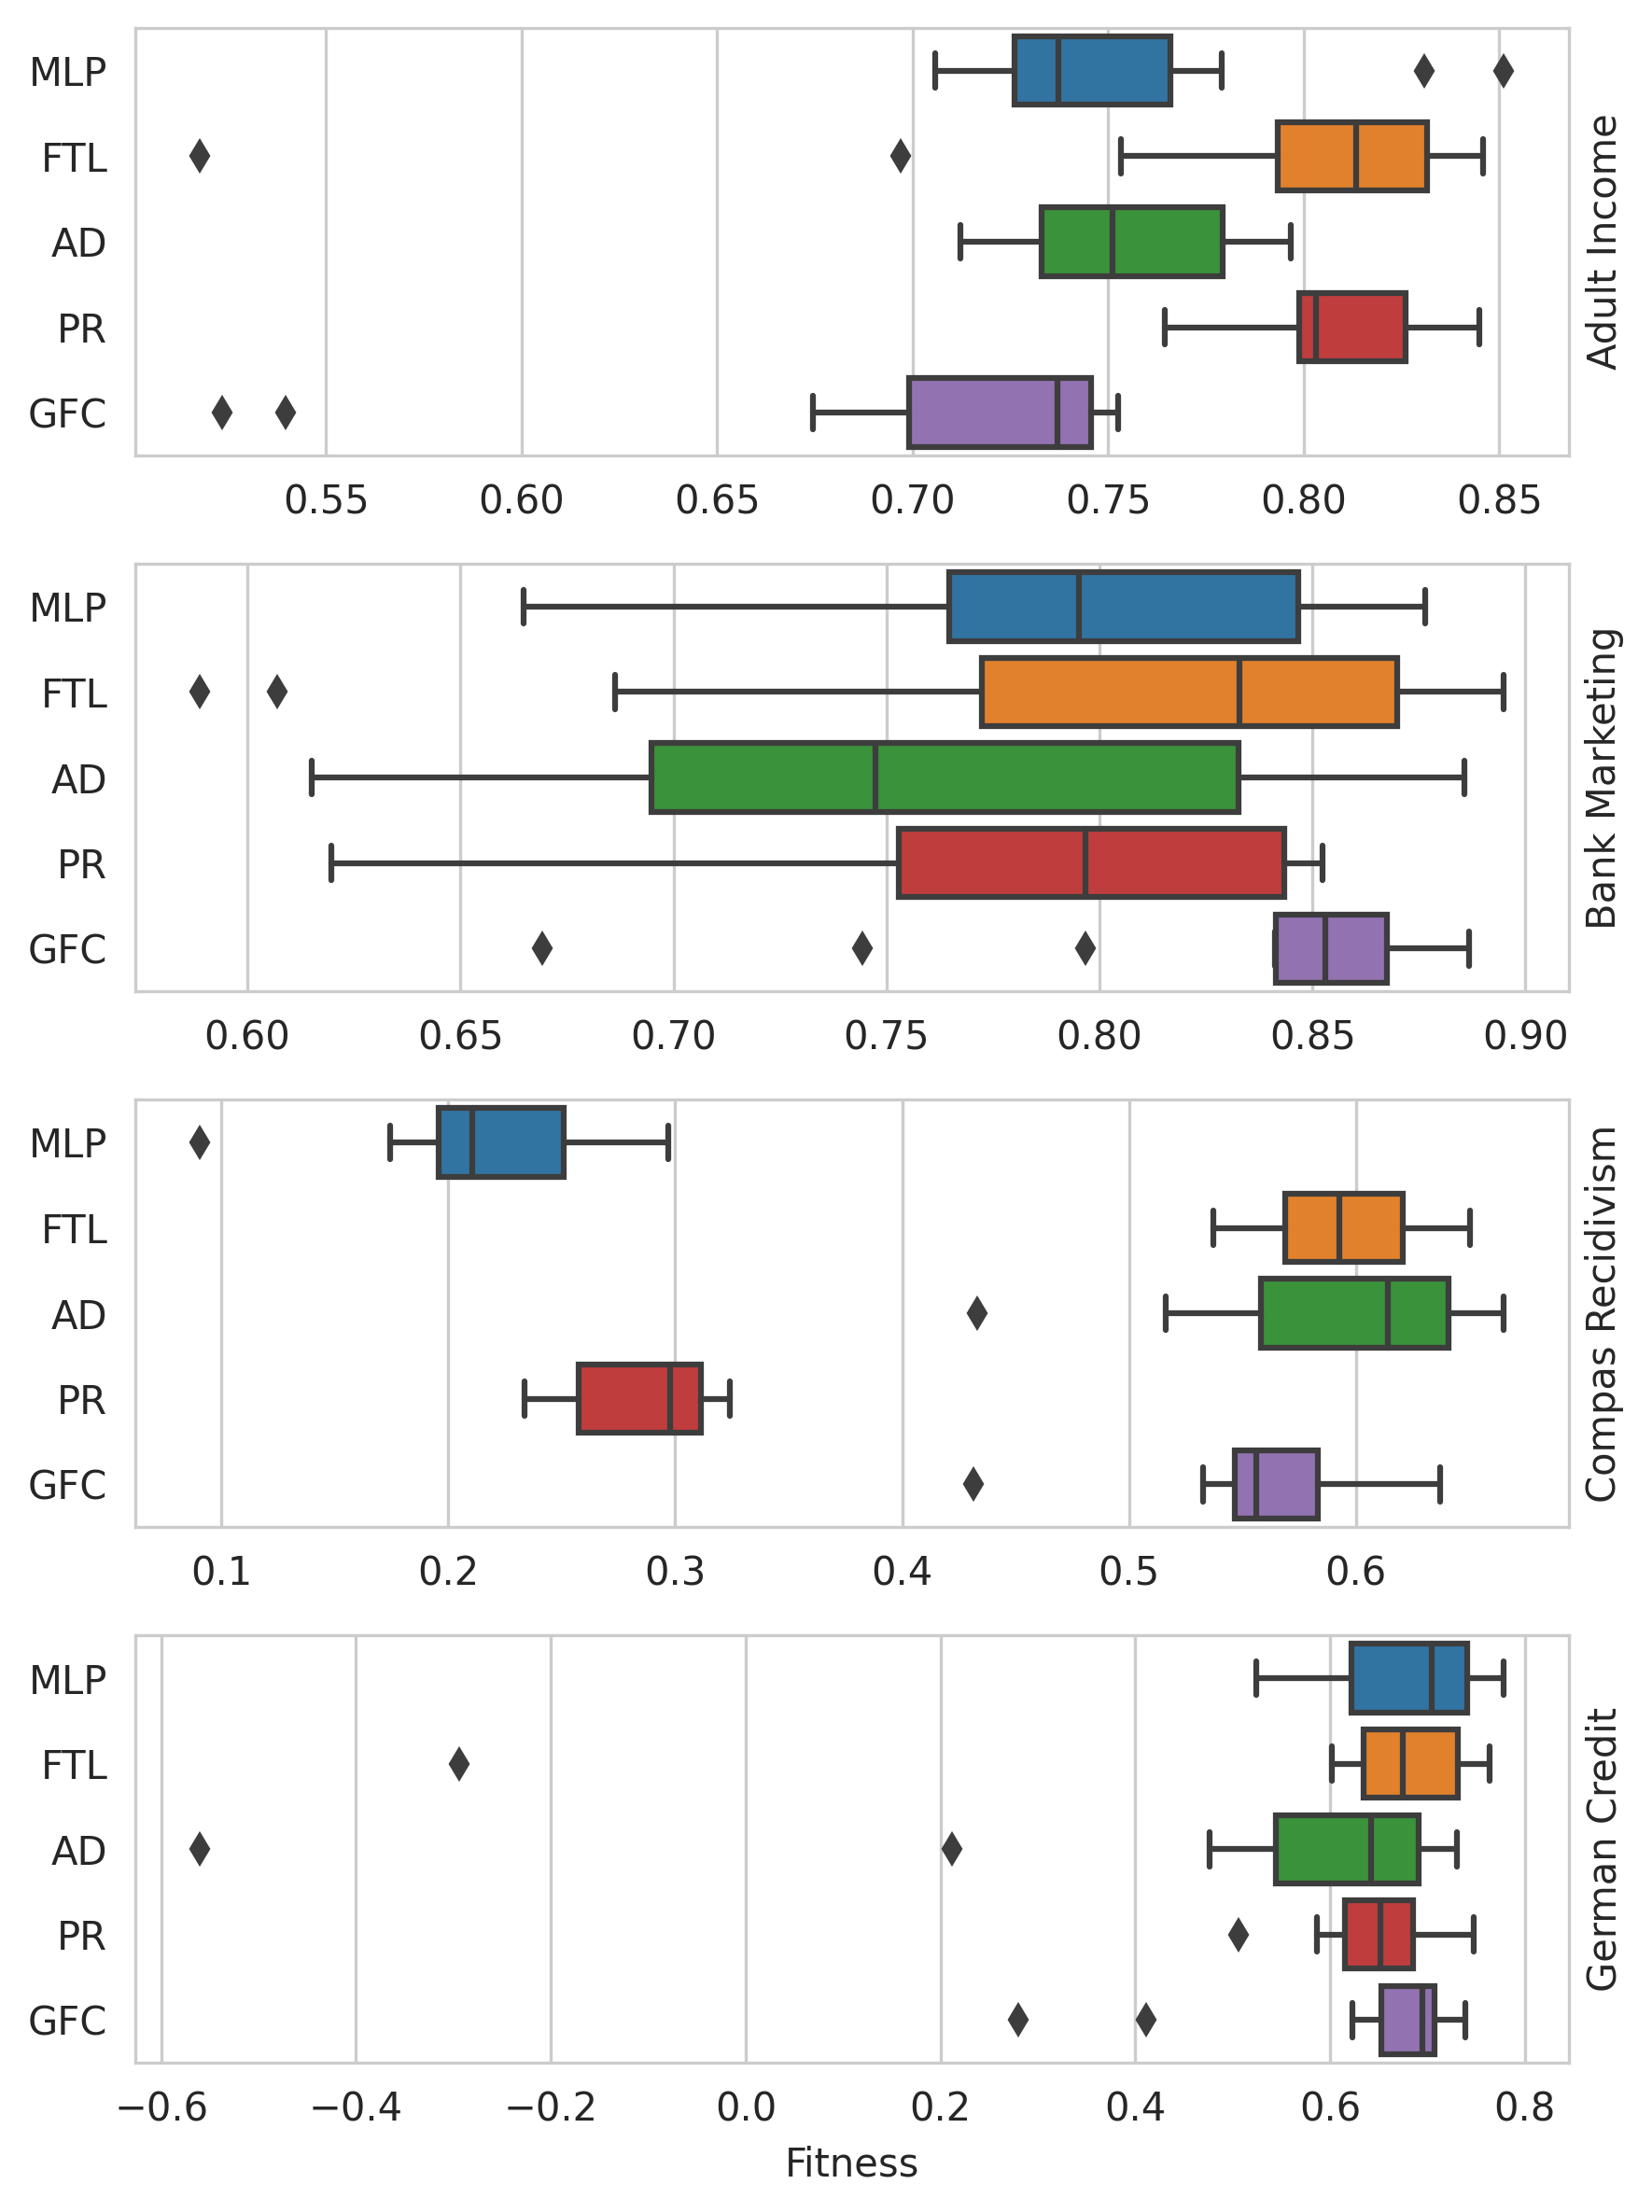

In [22]:
for fitness_rule in fitness_rules:
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))
    fig.subplots_adjust(hspace=0.7)

    for dataset, ax in zip(sorted(datasets), axes.flatten()):
        by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
        by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
        by_fitness_rule = by_fitness_rule.sort_values(by='method')

        boxplot = sns.boxplot(data=by_fitness_rule,
                    x='fitness', y='method', ax=ax)

        ax.set_ylabel(dataset)
        ax.yaxis.set_label_position("right")

        # Remove y-ticks from the second column
        if ax.get_subplotspec().colspan.start != 0:
            ax.set_yticks([])
            ax.set_ylabel('')

        # Remove x-ticks and labels from all but the last row
        if ax.get_subplotspec().rowspan.start != 3:
            ax.set_xlabel('')

    # Set x-labels for the last row
    axes[-1].set_xlabel('Fitness')

    plt.tight_layout()
    plt.savefig('plots/boxplot_%s.png' % fitness_rule)
    plt.show()